In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Her importeres en quizz modul for jupyter.
# Hvis den ikke allerede er installert blir den installert.
try:
  from jupyterquiz import display_quiz
except:
  !pip install jupyterquiz
  from jupyterquiz import display_quiz
# lenke til quizspørsmål
git_path=""

# Numerisk Integrasjon

Gitt en funksjon $f(x)$ er $\int_a^b f(x) dx$ arealet under grafen til $f(x)$ på intervallet fra $a$ til $b$.

![integral](Integral_example.svg)
[By I, KSmrq, CC BY-SA 3.0](https://commons.wikimedia.org/w/index.php?curid=2268147)

In [2]:
n = 10
# Oppretter et NumPy array med n jevnt fordelte verdier mellom 0 og 1 (inkludert)
x = np.linspace(0, 1, n) 
# Beregner avstanden mellom punktene i arrayet x
dx = x[1] - x[0]
# Lager kopier av tallene i x der siste eller førest tall er utelatt. 
yv = x[:-1] # v for venstre endepunkter
yh = x[1:] # h for høyre endepunkter

In [3]:
# Approksimerer integralet av funksjonen representert ved y ved hjelp av venstre- og høyre Riemann summer
zv = dx * np.cumsum(yv)
zh = dx * np.cumsum(yh)

## Eksempel

Forklar hva funksjonen np.cumsum gjør. Skriv en funksjon i python uten bruk an numpy som gjør det samme.

In [4]:
integral = 0.5 * x**2

In [5]:
plt.plot(x[1:], zv, label='Venstre Riemann sum for f(x)=x')
plt.plot(x[1:], zh, label='Høyre Riemann sum for f(x)=x')
plt.plot(x, integral, label='eksakt integral $\frac{1}{2}x^2$')
plt.legend()

Error in callback <function _draw_all_if_interactive at 0x7fffbd02fc40> (for post_execute), with arguments args (),kwargs {}:


ValueError: 
eksakt integral $rac{1}{2}x^2$
                ^
ParseException: Expected end of text, found '$'  (at char 16), (line:1, col:17)

ValueError: 
eksakt integral $rac{1}{2}x^2$
                ^
ParseException: Expected end of text, found '$'  (at char 16), (line:1, col:17)

<Figure size 640x480 with 1 Axes>

## Venstre Riemann sum

![leftintegral](LeftRiemann2.svg)
[By Qef - Own work, Public Domain](https://commons.wikimedia.org/w/index.php?curid=7081804)

## Høyre Riemann sum

![rightintegral](RightRiemann2.svg)
[By Qef - Own work, Public Domain](https://commons.wikimedia.org/w/index.php?curid=7081806)

## Øvre og nedre Riemannsummer

I stedet for å ta funksjonsversien i venstre- eller høyre endepunkt av delintevallene kan vi tilnærme arealet under grafen til funksjonen ved bredden av delintervallet ganger den største funksjonsverdien på dette delintervallet. Dette gir øvre Riemannsummen. Tilsvarende kan nedre Riemannsummer beregnes ved å bruke den minste funksjonsverdien på delintervallet. 

Funksjonen på illustrasjonene over er voksende. Derfor er høyre Riemannsummen lik den øvre Riemannsummen for denne funksjonen, og venstre Riemannsummen er lik den nedre Riemannsummen.

## Eksempel

La 
$$f(x) = \frac{1}{\sqrt{2*\pi}} e^{- \frac{x^2}{2}}$$
Plot integralfunksjonen
$$F(x) = 0.5 + \int_{0}^x f(t) d t$$
på intervallet fra $0$ til $2$. (Opp til fem desimalers presisjon er $F(2) = 0.97725$)

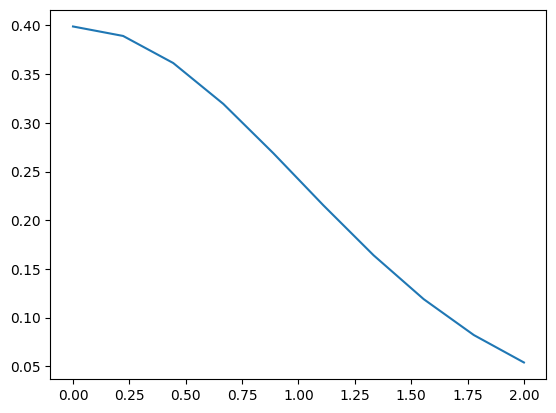

In [6]:
def f(x):
    return np.exp(-x**2/2) / np.sqrt((2 * np.pi))

n = 10
# Oppretter et NumPy array med n jevnt fordelte verdier mellom 0 og 2 (inkludert)
x = np.linspace(0, 2, n) 

plt.plot(x, f(x))

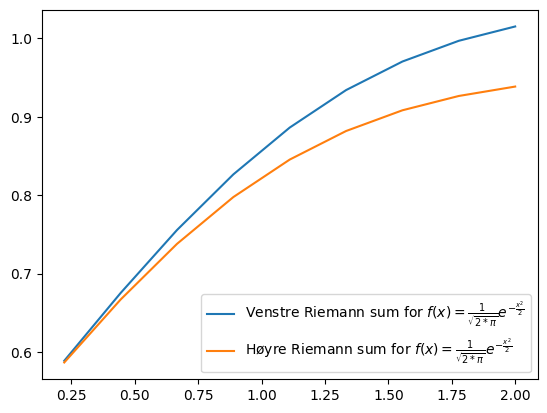

In [7]:
# Leser av avstanden mellom punktene i arrayet x
dx = x[1] - x[0]
# Lager arrayet y med funksjonsverdiene til f anvendt på elementene i x untatt siste elementet
yv = f(x[:-1])
# Lager en arrayet y med funksjonsverdiene til f anvendt på elementene i x untatt første elementet
yh = f(x[1:])

# Approksimerer integralet av funksjonen representert ved y ved hjelp av venstre Riemann summer
zv = 0.5 + dx * np.cumsum(yv)

# Approksimerer integralet av funksjonen representert ved y ved hjelp av høyre Riemann summer
zh = 0.5 + dx * np.cumsum(yh)

plt.plot(x[1:], zv, label=r'Venstre Riemann sum for $f(x) = \frac{1}{\sqrt{2*\pi}} e^{- \frac{x^2}{2}}$')
plt.plot(x[1:], zh, label=r'Høyre Riemann sum for $f(x) = \frac{1}{\sqrt{2*\pi}} e^{- \frac{x^2}{2}}$')
plt.legend()

## Trapes Riemann sum

For trapes regelen blir funksjonen approksimert av gjennomsnittet af verdiene sine i høyre og venstre endepunkter av delintervallene.

![leftintegral](TrapRiemann2.svg)
[By Qef - Own work, Public Domain](https://commons.wikimedia.org/w/index.php?curid=7081807)

In [8]:
0.5 + np.trapezoid(f(x), dx=dx)

np.float64(0.9768058675868853)

In [9]:
zv[-1]

np.float64(1.015133791352246)

In [10]:
zh[-1]

np.float64(0.9384779438215247)

Siden funksjonen vi jobber med er avtagende vet vi at det eksakte integralet ligger mellom approksimasjonene ved venstre og høyre Riemannsummer. Derfor er feilen mindre enn deres forskjell.

In [11]:
zv[-1] - zh[-1]

np.float64(0.0766558475307213)

## Litt om feil

Dersom funksjonen $f(x)$ er "fin" finnes det metoder til å beskrive forskjellen mellom våre numeriske apporksjmasjoner til integralet av funksjonen og det eksakte integralet. Hvis vi ikke vet mere om funksjonen enn en liste av funksjonsverdier kan ikke disse metodene brukes. Metodene kan likevel være viktige for å vurdere om beregningene vi gjør er fornuftige og rimelige. Kort fortalt kan er de numeriske resultatene antakelig pålitelige dersom de stort sett stemmer overens for mange forskjellige steglengder $dx$ i avstanden mellom punktene vi tar funksjonsverdier i. For empirisk data kan dette avprøves ved å utelate data og se om det endrer på resultatene. 

## Feil for trapesregelen

Dersom funksjonen $f(x)$ er to ganger deriverbar og definert på et åpent intervall som inneholder $[a,b]$, da er forskjellen mellom resultatet av trapesregelen og integralet 
$\int_a^b f(x) d x$ mindre enn 
$$\frac{(b - a)^3}{12n^2} f''(t)$$
for en $t$ i $[a,b]$. Her er $n$ antallet av delintervaller.

[Her er en quiz om numerisk integrasjon. Den var del av eksamen i fjor.](https://mitt.uib.no/courses/50911/quizzes/48225)